# Lab 7.2 Supplement: ETS and ARIMA

## Modeling Monthly Birth Data   

...continuing from yesterday's lab....

11) Use time series regression methods to fit a model. Using `OLS` in `statsmodels`, fit the overall trend with increasing polynomial terms. 
    - You will need to take your `time` variable and create `time^2, time^3
    time^4, time^5`
    - Increase model complexity by adding a higher order term
        - Examine the summary information and compare each model to the 
          model before""ith `time` + `time^2`) by examining AIC/BIC.
        - Superimpose (by plotting) the fitted onto the original data and predict
          the values for 2011
        - Keep increasing until general trend has been captured 
          (You won't be able to capture the bump between 1999-2004 without a very 
          complicated model and there's no reason to assume that future values 
          wouldn't follow the more general trend) 

In [1]:
import pandas as pd
births_df = pd.read_csv('https://s3-us-west-2.amazonaws.com/dsci/6002/data/birth.txt')
births_original = births_df.copy()

In [3]:
dates = pd.date_range(start='01/01/1980',end='12/31/2010',freq='M')


In [5]:
month = dates.month
births_df['Month']=dates

In [60]:
births_df['Time']=  list(range(1,373))
births_df.head()

,num_births,Month,Time,Time^2,Time^3,Time^4,Time^5,Time^6,month
0,295,1980-01-31,1,1,1,1,1,1,1
1,286,1980-02-29,2,4,8,16,32,64,2
2,300,1980-03-31,3,9,27,81,243,729,3
3,278,1980-04-30,4,16,64,256,1024,4096,4
4,272,1980-05-31,5,25,125,625,3125,15625,5


In [11]:
births_df['Time^2']=  births_df['Time']**2

In [13]:
births_df['Time^3'] = births_df['Time']**3

In [22]:
births_df['Time^4']=births_df['Time']**4
births_df['Time^5']=births_df['Time']**5
births_df['Time^6']=births_df['Time']**6

In [20]:
import statsmodels.api as smf

In [98]:
x = births_df[['Time^2','Time^3','Time^4','Time^5']]
x = smf.add_constant(x)
y=births_df['num_births']

model = smf.OLS(y,x)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             num_births   R-squared:                       0.732
Model:                            OLS   Adj. R-squared:                  0.729
Method:                 Least Squares   F-statistic:                     250.4
Date:                Tue, 11 Oct 2016   Prob (F-statistic):          1.78e-103
Time:                        15:11:02   Log-Likelihood:                -1606.8
No. Observations:                 372   AIC:                             3224.
Df Residuals:                     367   BIC:                             3243.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const        290.6851      2.863    101.543      0.000       285.056   296.314
Time^2         0.0153      0.001     11.839      0.000         0.013     0.018
Time^3        -0.0001    1.4e-05     -9.229      0.000        -0.000    -0.000
Time^4      3.536e-07   5.18e-08      6.821      0.000      2.52e-07  4.56e-07
Time^5     -3.134e-10   6.33e-11     -4.953      0.000     -4.38e-10 -1.89e-10
==============================================================================
Omnibus:                        4.649   Durbin-Watson:                   0.867
Prob(Omnibus):                  0.098   Jarque-Bera (JB):                3.619
Skew:                           0.125   Prob(JB):                        0.164
Kurtosis:                       2.586   Cond. No.                     6.53e+12
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.53e+12. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [38]:
import seaborn as sns


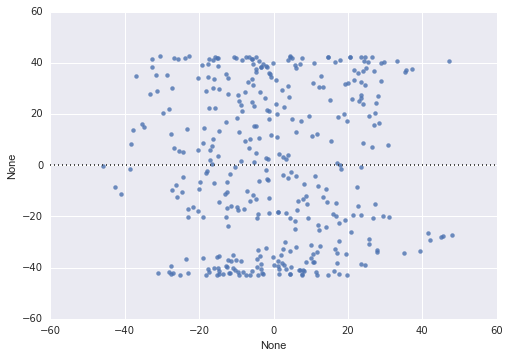

In [39]:
sns.residplot(results.resid,results.fittedvalues)

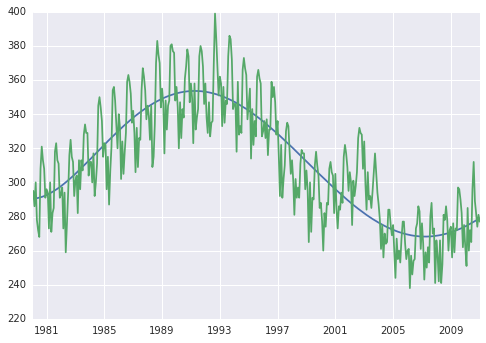

In [45]:
plt.plot(births_df.Month,results.fittedvalues)
plt.plot(births_df.Month,births_df.num_births)

In [93]:
births_df.tail()

,num_births,Month,Time,Time^2,Time^3,Time^4,Time^5,Time^6,month,Quarter
367,289,2010-08-31,368,135424,49836032,18339659776,6748994797568,2483630085505024,8,3
368,282,2010-09-30,369,136161,50243409,18539817921,6841192812849,2524400147941281,9,3
369,274,2010-10-31,370,136900,50653000,18741610000,6934395700000,2565726409000000,10,4
370,281,2010-11-30,371,137641,51064811,18945044881,7028611650851,2607614922465721,11,4
371,277,2010-12-31,372,138384,51478848,19150131456,7123848901632,2650071791407104,12,4


In [99]:
results.predict([1,373**2,373**3,373*4,373**5])

array([-6565.41503551])

12) Now that you have fit trend, add in the monthly component via dummy variables to capture seasonality.  You could  also try to create a 'seasons of the year' variable and fit the quarterly time series instead of the original monthly time you plotted earlier...opportunity to play around.

In [52]:
births_df['month'] = dates.month

In [73]:
x2 = births_df[['month','Time^2','Time^3','Time^4','Time^5']]
x2 = smf.add_constant(x2)
y2=births_df['num_births']

model2 = smf.OLS(y2,x2)
results2 = model2.fit()
results2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             num_births   R-squared:                       0.784
Model:                            OLS   Adj. R-squared:                  0.781
Method:                 Least Squares   F-statistic:                     265.6
Date:                Tue, 11 Oct 2016   Prob (F-statistic):          2.18e-119
Time:                        15:02:01   Log-Likelihood:                -1566.6
No. Observations:                 372   AIC:                             3145.
Df Residuals:                     366   BIC:                             3169.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const        276.0200      3.009     91.732      0.000       270.103   281.937
month          2.3261      0.247      9.399      0.000         1.839     2.813
Time^2         0.0152      0.001     13.169      0.000         0.013     0.018
Time^3        -0.0001   1.26e-05    -10.323      0.000        -0.000    -0.000
Time^4      3.583e-07   4.66e-08      7.690      0.000      2.67e-07   4.5e-07
Time^5     -3.215e-10   5.69e-11     -5.651      0.000     -4.33e-10  -2.1e-10
==============================================================================
Omnibus:                       13.175   Durbin-Watson:                   1.157
Prob(Omnibus):                  0.001   Jarque-Bera (JB):                8.131
Skew:                           0.206   Prob(JB):                       0.0172
Kurtosis:                       2.404   Cond. No.                     7.64e+12
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.64e+12. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

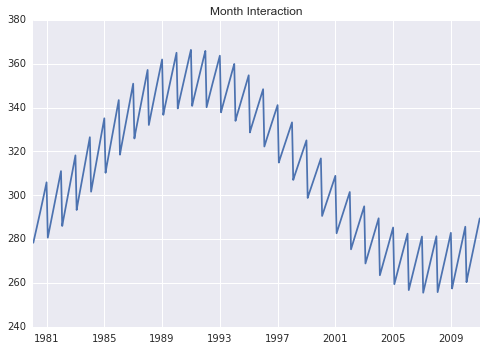

In [101]:
plt.plot(births_df.Month,results2.fittedvalues)
#plt.plot(births_df.Month,births_df.num_births)
plt.title('Month Interaction')

In [100]:
results2.predict([1,1,373**2,373**3,373*4,373**5])

array([-6671.71148484])

13) Plot the `dates` variable (`x`) against the residuals (`y`) of the final model (including the seasonality term).
    Is there an obvious pattern of the residuals with respect to time? If there is any autocorrelation left in the 
    model, there will be some pattern in your residual and we'll learn to address that in the afternoon.

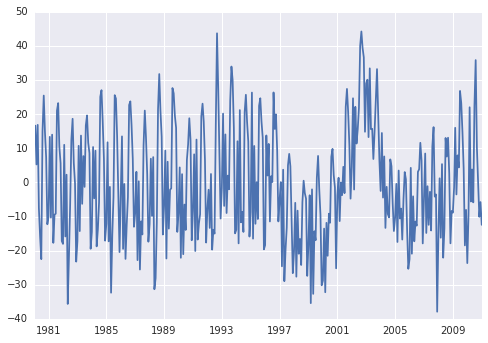

In [75]:
plt.plot(births_df.Month,results2.resid)

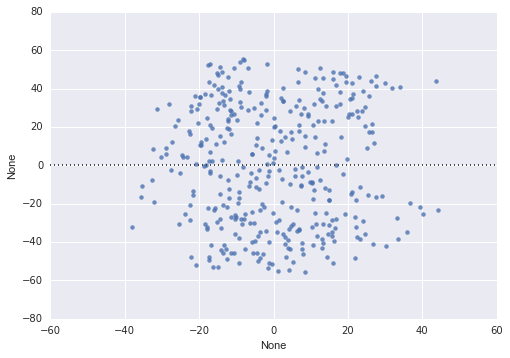

In [76]:
sns.residplot(results2.resid,results2.fittedvalues)

In [71]:
quarterly_mean_births_df = births_df[['num_births','Month']].resample('Q-NOV')


TypeError: Only valid with DatetimeIndex, TimedeltaIndex or PeriodIndex, but got an instance of 'RangeIndex'

In [83]:
births_df['Quarter']=births_df.Month.apply( lambda x: x.quarter )

In [85]:
x3 = births_df[['month','Time^2','Time^3','Time^4','Time^5','Quarter']]
x3 = smf.add_constant(x3)
y3=births_df['num_births']

model3 = smf.OLS(y3,x3)
results3 = model3.fit()
results3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             num_births   R-squared:                       0.785
Model:                            OLS   Adj. R-squared:                  0.781
Method:                 Least Squares   F-statistic:                     221.7
Date:                Tue, 11 Oct 2016   Prob (F-statistic):          1.97e-118
Time:                        15:04:31   Log-Likelihood:                -1565.9
No. Observations:                 372   AIC:                             3146.
Df Residuals:                     365   BIC:                             3173.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const        274.3585      3.346     82.002      0.000       267.779   280.938
month          1.1756      1.044      1.126      0.261        -0.878     3.229
Time^2         0.0152      0.001     13.174      0.000         0.013     0.018
Time^3        -0.0001   1.26e-05    -10.327      0.000        -0.000    -0.000
Time^4      3.583e-07   4.66e-08      7.693      0.000      2.67e-07   4.5e-07
Time^5     -3.215e-10   5.69e-11     -5.653      0.000     -4.33e-10  -2.1e-10
Quarter        3.6560      3.224      1.134      0.258        -2.685     9.997
==============================================================================
Omnibus:                       11.165   Durbin-Watson:                   1.160
Prob(Omnibus):                  0.004   Jarque-Bera (JB):                7.124
Skew:                           0.187   Prob(JB):                       0.0284
Kurtosis:                       2.435   Cond. No.                     1.02e+13
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.02e+13. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# The quarterly data does not add any predictive power.

14) Fit a ARIMA or seasonal ARIMA model to the birth data.

In [102]:
data = sm.datasets.macrodata.load_pandas()
df = data.data

df.index = pd.Index(sm.tsa.datetools.dates_from_range('1959Q1', '2009Q3'))
y = df.m1
X = df[['realgdp', 'cpi']]
model = sm.tsa.ARIMA(endog=y, order=[1,1,1])
results = model.fit()
results.summary2()

NameError: name 'sm' is not defined